In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

read the data

In [2]:
di=pd.read_csv('delivery_time.csv')

In [3]:
di.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
di.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'},inplace=True) 
di.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [6]:
di.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
di.isnull().sum()

DT    0
ST    0
dtype: int64

heatmap

<Axes: >

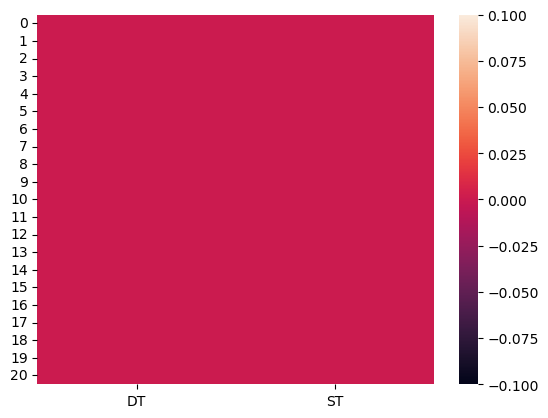

In [8]:
sns.heatmap(di.isnull())

In [9]:
di.corr

<bound method DataFrame.corr of        DT  ST
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5>

<Axes: >

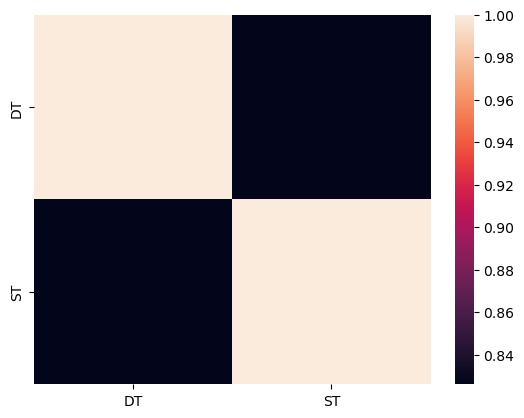

In [10]:
sns.heatmap(di.corr())

In [11]:
di.duplicated().sum()

0

# Performing some basic Statistics

In [12]:
di.DT.mean(),di.ST.mean()

(16.790952380952383, 6.190476190476191)

In [13]:
di.DT.median(),di.ST.median()

(17.83, 6.0)

In [14]:
di.DT.mode()[0],di.ST.mode()[0]

(8.0, 7)

In [15]:
std1=di.DT.std()

In [16]:
std1

5.074900890423285

In [17]:
std2=di.ST.std()

In [18]:
std2

2.5420276870846155

In [19]:
v1=std1**2

In [20]:
v1

25.754619047619048

In [21]:
v2=std2**2

In [22]:
v2

6.461904761904759

# log and sqr

In [23]:
result=np.log(di.DT)[1]
print(result)

2.6026896854443837


In [56]:
result=np.log(di.ST)[1]
print(result)

1.3862943611198906


In [24]:
cube_root_arr=(di.DT**(1/3))[1]
cube_root_arr

2.381101577952299

In [58]:
cube_root_arr=(di.ST**(1/3))[1]
cube_root_arr

1.5874010519681994

# plot 

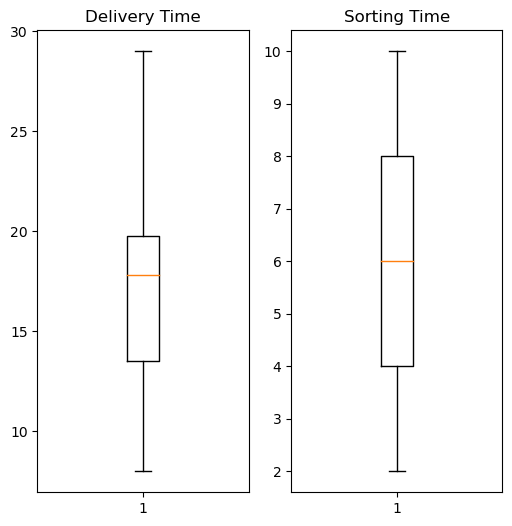

In [25]:
plt.subplots(figsize = (6,6))
plt.subplot(121)
plt.boxplot(di['DT'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(di['ST'])
plt.title('Sorting Time')
plt.show()

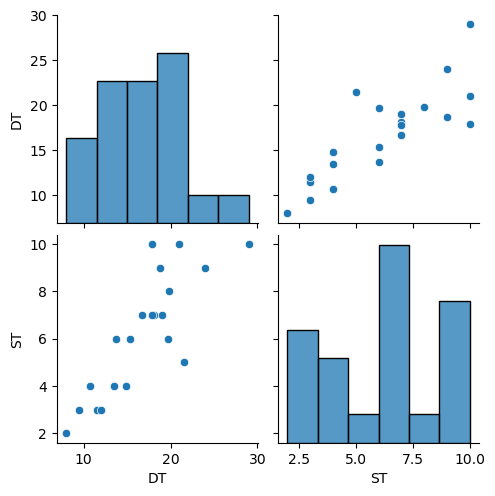

In [26]:
sns.pairplot(data=di)
plt.show()

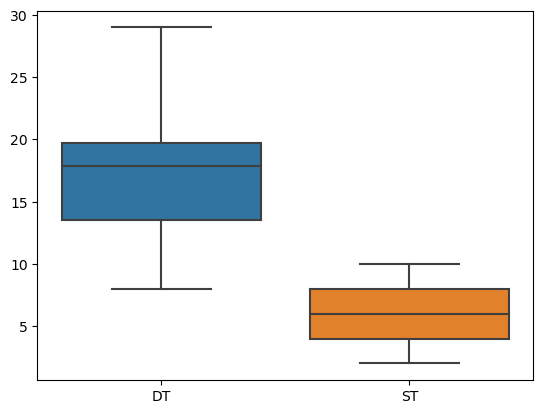

In [27]:
sns.boxplot(data=di)
plt.show()

<Axes: xlabel='DT', ylabel='Density'>

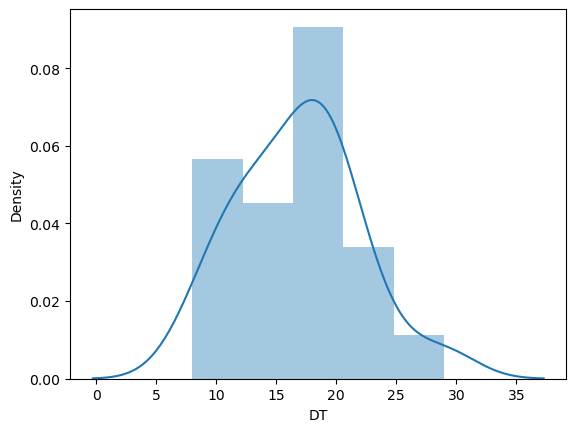

In [28]:
sns.distplot(di['DT'])

<Axes: xlabel='ST', ylabel='Density'>

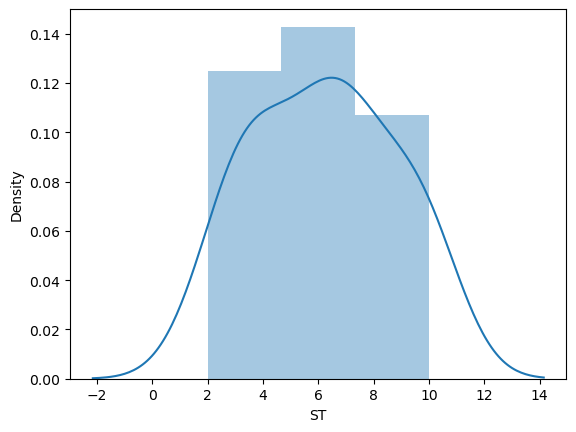

In [29]:
sns.distplot(di['ST'])

<Axes: xlabel='DT', ylabel='ST'>

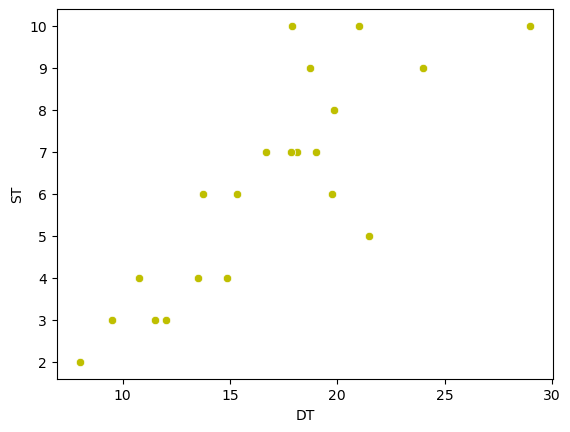

In [30]:
sns.scatterplot(x=di['DT'],y=di['ST'],color='y')

<Axes: xlabel='ST', ylabel='DT'>

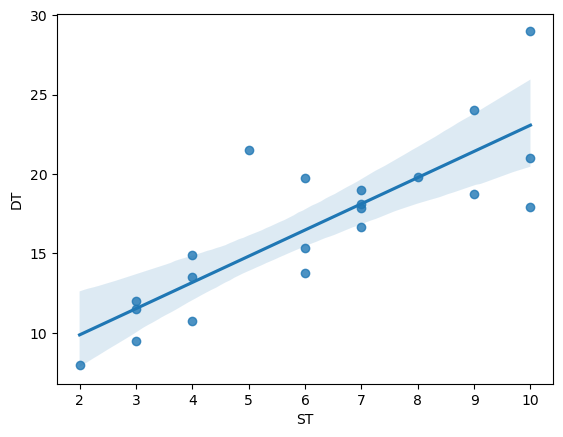

In [31]:
sns.regplot(x=di['ST'],y=di['DT'])  

# IMPORT MODEL

split the data and  train and test the data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=di['DT'].values.reshape(-1,1)
Y=di['ST']

In [34]:
X[:5]

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ]])

In [35]:
Y[:5]

0    10
1     4
2     6
3     9
4    10
Name: ST, dtype: int64

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((16, 1), (5, 1), (16,), (5,))

Build the model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
log=LinearRegression()

In [39]:
log.fit(X_train,Y_train)

LinearRegression()

train model

In [40]:
Y_pred=log.predict(X_train)
Y_pred

array([3.33136286, 1.97280641, 6.96735395, 8.39507327, 7.28352708,
       3.70187826, 5.37166764, 7.81706925, 9.87713485, 7.77754761,
       6.8290282 , 6.26090459, 4.68991931, 5.60385729, 2.7138372 ,
       7.40703221])

test model

In [41]:
X_pred=log.predict(X_test)
X_pred

array([ 4.81342445,  8.64208353,  3.96370914, 12.34723749,  6.86360963])

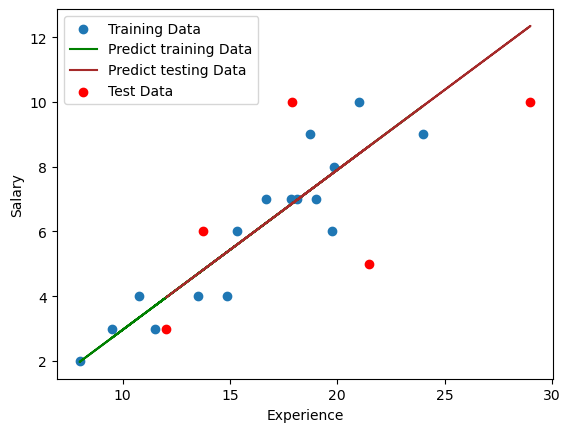

In [42]:
plt.scatter(X_train, Y_train, label='Training Data')
plt.plot(X_train,Y_pred,color='green',label="Predict training Data")
plt.plot(X_test,X_pred,color='brown',label="Predict testing Data")
plt.scatter(X_test, Y_test, color='red', label='Test Data')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

find the metrics for regression

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [44]:
train_mse=mean_squared_error(Y_train,Y_pred)
train_mse

0.8602209588751217

In [45]:
test_mse=mean_squared_error(Y_test,X_pred)
test_mse

6.189587533607991

In [46]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

In [47]:
train_rmse,train_rmse

(0.9274809749397136, 0.9274809749397136)

In [48]:
np.random.rand(10)

array([0.26165928, 0.91191564, 0.19420585, 0.92274833, 0.39486138,
       0.047121  , 0.10051405, 0.62118605, 0.25003569, 0.27337765])

# Predicting

In [49]:
new_data=pd.Series([9,5,7])

In [50]:
data_pred=pd.DataFrame(new_data,columns=['DT'])
data_pred

,DT
0,9
1,5
2,7


In [51]:
log.predict(data_pred)


array([2.46682694, 0.49074483, 1.47878589])

# math function

In [52]:
train_rmse=math.sqrt(train_mse)

In [53]:
test_rmse=math.sqrt(test_mse)

In [54]:
train_rmse,test_rmse

(0.9274809749397136, 2.487888167423928)